In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [7]:
df = pd.read_csv('E-commerce.csv')
df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


## K-Means from Scratch

**Initializing all the variables and data**

In [8]:
data_size = 1000
num_iters = 5
num_clusters = 4

from sklearn.datasets import make_blobs
data, y = make_blobs(n_samples=2000, centers=4, n_features=2,random_state=0)

**Function to plot the clusters**

In [9]:
import matplotlib.pyplot as plt
def plot(data, centroids):
    plt.scatter(data[:, 0], data[:, 1], marker = '.',
                color = 'gray', label = 'data points')
    plt.scatter(centroids[:, 0], centroids[:, 1],
                color = 'red', label = 'centroid')     
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()

In [13]:
# Initialise centroids
centroids = data[np.random.choice(range(data.shape[0]), size = (4, ))]

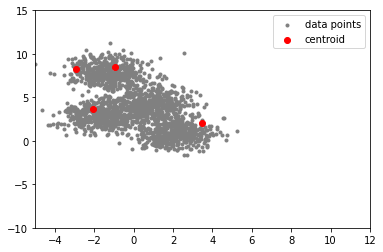

In [14]:
plot(data, centroids)

**Implementing K-means**

In [15]:
def euclidean(x, centroids):
    dist = np.array([]).reshape(len(x),0)
    for centroid in centroids:
        distance = np.sqrt(((x - centroid) ** 2).sum(axis = 1)).reshape(-1,1)
        dist = np.hstack([dist, distance])    
    return dist

euclidean(data, centroids)

array([[3.95219868, 6.9763201 , 2.55109398, 6.73126959],
       [4.20969226, 5.11766692, 1.74309252, 4.64373652],
       [1.61845374, 8.91892028, 5.1112016 , 8.1043895 ],
       ...,
       [3.17375634, 5.74653032, 3.13713177, 4.78035797],
       [4.37821348, 5.13325107, 1.48775306, 4.7721136 ],
       [2.44222152, 6.61270242, 4.40935649, 5.33765016]])

In [17]:
data.shape

(2000, 2)

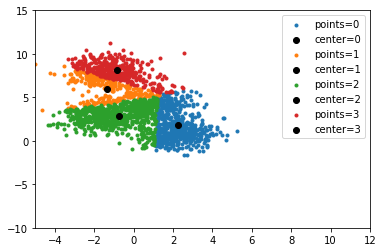

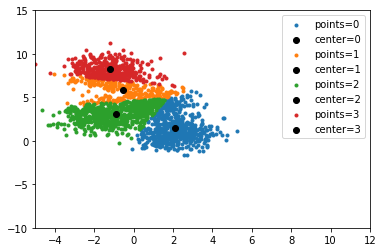

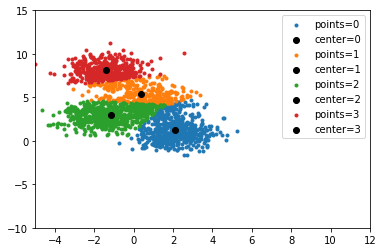

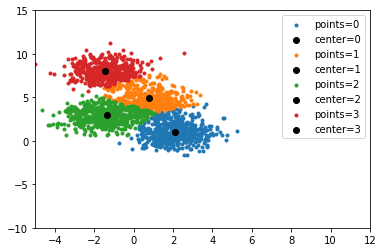

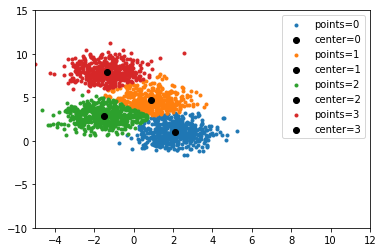

In [62]:
# Initialise centroids
centroids = data[np.random.choice(range(data.shape[0]), size = (4, ))]

# Create a list to store which centroid is assigned to each dataset
assigned_centroids = np.zeros(len(data), dtype = np.int32)

def euclidean(x, centroids):
    dist = np.array([]).reshape(len(x),0)
    for centroid in centroids:
        distance = np.sqrt(((x - centroid) ** 2).sum(axis = 1)).reshape(-1,1)
        dist = np.hstack([dist, distance])    
    return dist

def get_closest_centroid(x, centroids):
    
    # Loop over each centroid and compute the distance from data point.
    dist = euclidean(x, centroids)

    # Get the index of the centroid with the smallest distance to the data point
    closest_centroid_index =  np.argmin(dist, axis = 1)
    
    return closest_centroid_index

animation_df = pd.DataFrame()  # only for animation

# Loop over iterations
for n in range(num_iters):  

    # Get the closest centroid
    closest_centroid = get_closest_centroid(data, centroids)
    
    # Assign the centroid to the data point.
    assigned_centroids = closest_centroid
    
    # only for animation (skip)
    adf = pd.DataFrame()
    adf[['x', 'y']] = data
    adf['color'] = assigned_centroids
    adf['size'] = 5
    cdf = pd.DataFrame()
    cdf[['x','y']] = centroids
    cdf['color'] = 'red'
    cdf['size'] = 20
    adf = pd.concat([adf, cdf])
    adf['frame'] = n
    animation_df = pd.concat([animation_df, adf])


    # Loop over centroids and compute the new ones.
    for c in range(len(centroids)):
        # Get all the data points belonging to a particular cluster
        cluster_data = data[assigned_centroids == c]
        
        # Compute the average of cluster members to compute new centroid
        new_centroid = cluster_data.mean(axis = 0)
        
        # assign the new centroid
        centroids[c] = new_centroid

        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], marker = '.', label = f'points={c}')
        plt.scatter(centroids[c][0], centroids[c][1], color = 'black', label = f'center={c}')     
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()
    # plot(data, centroids)

**Animation**

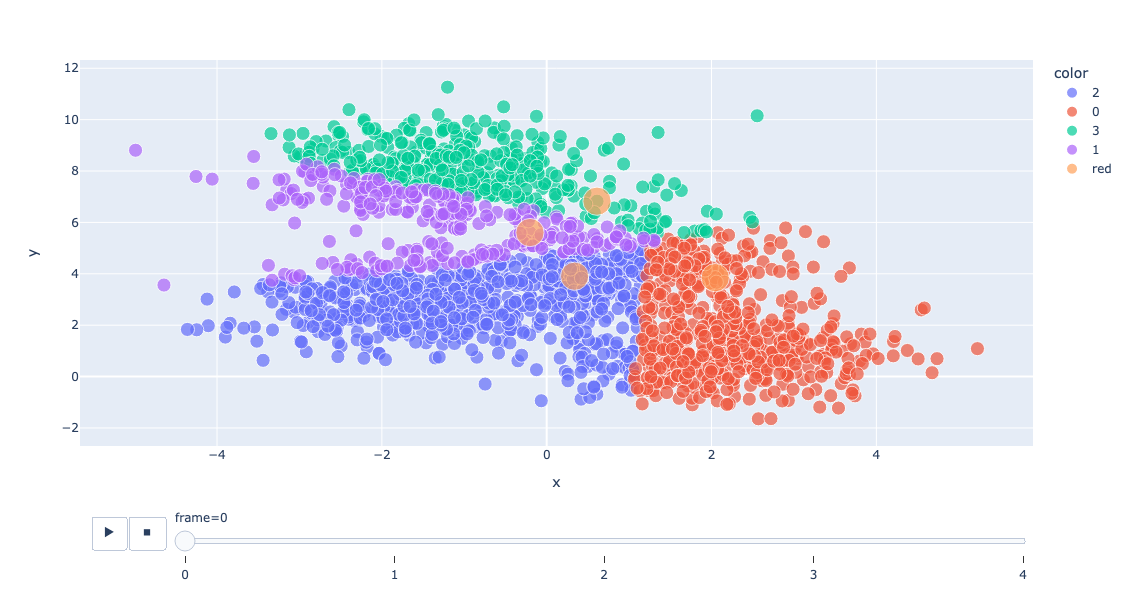

In [63]:
import plotly.express as px

px.scatter(animation_df, x="x", y="y", animation_frame="frame", color="color", size='size', width=800, height=600)

## Case Study

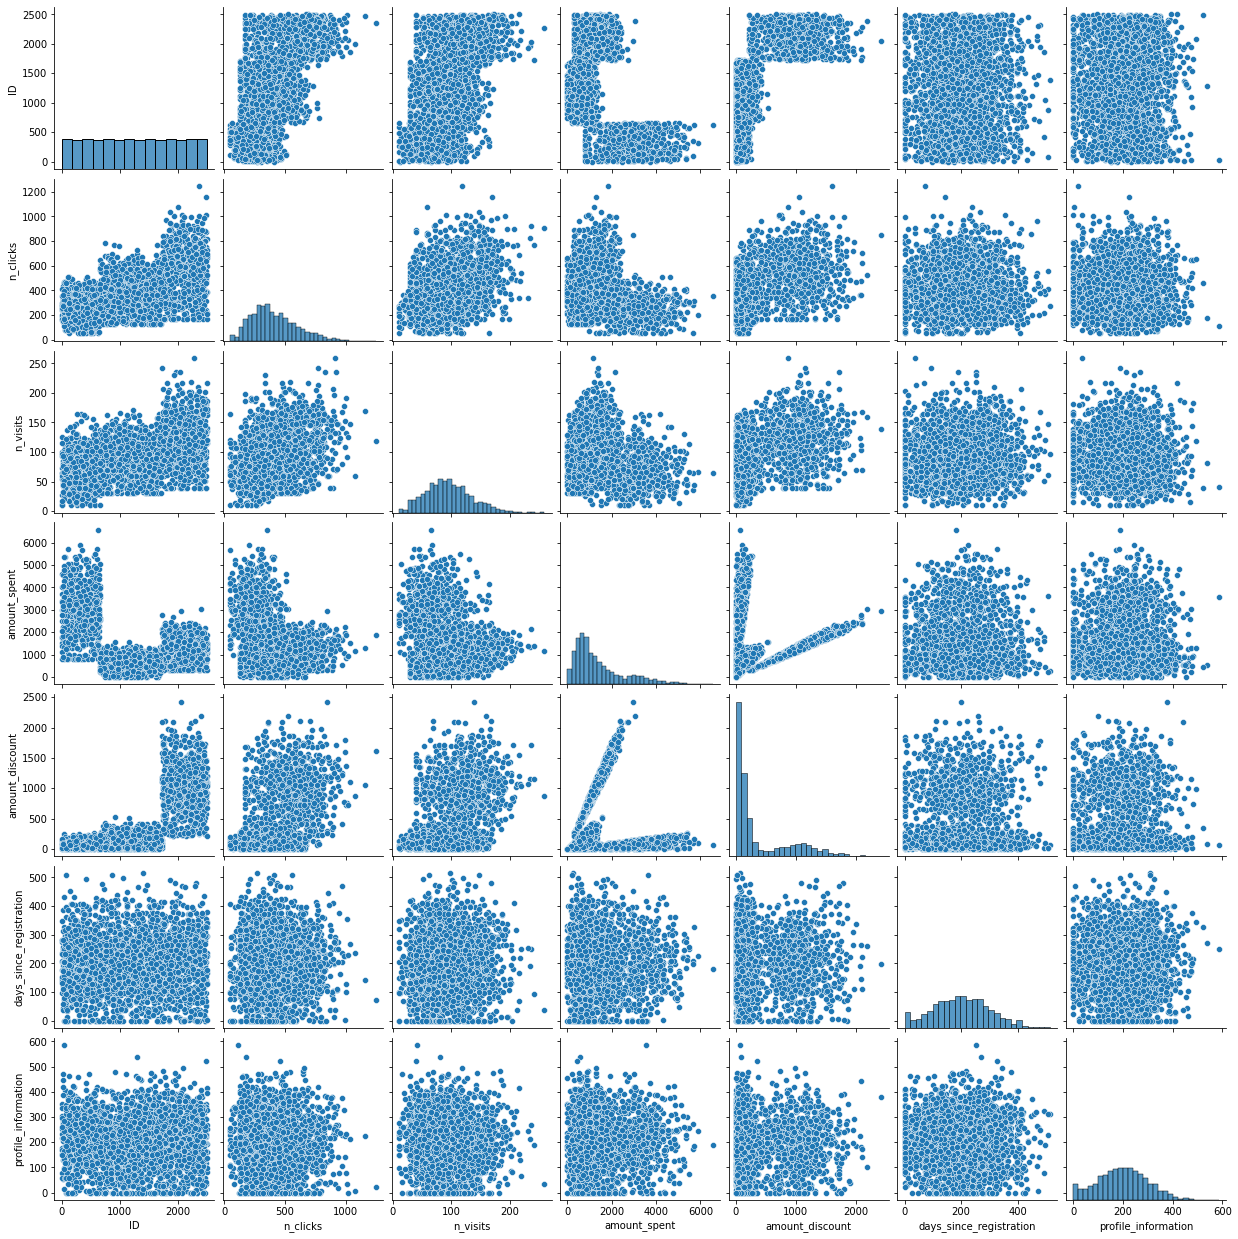

In [ ]:
sns.pairplot(df)

In [22]:
X=df.drop("ID",axis=1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2500 non-null   int64  
 1   n_clicks                 2500 non-null   int64  
 2   n_visits                 2500 non-null   int64  
 3   amount_spent             2500 non-null   float64
 4   amount_discount          2500 non-null   float64
 5   days_since_registration  2500 non-null   int64  
 6   profile_information      2500 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 136.8 KB


In [24]:
X.describe()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,408.68000,94.475600,1445.090745,388.508637,200.973600,201.040400
std,186.41409,38.866356,1167.663473,487.143968,99.136618,100.139213
min,50.00000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,274.75000,67.000000,609.618538,56.298615,130.000000,132.000000
50%,378.00000,92.000000,1036.189112,137.454623,200.000000,201.000000
75%,522.00000,119.000000,1949.270949,679.540536,268.000000,270.000000
max,1246.00000,259.000000,6567.402267,2428.406527,514.000000,585.000000


In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

Let's use K-means from scikit learn library.

In [26]:
from sklearn.cluster import KMeans

k = 4 ## arbitrary value
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

Let's try to see what did the Kmeans predict?
- It predicted the cluster labels for all the points.

In [27]:
y_pred

array([3, 3, 1, ..., 2, 0, 1], dtype=int32)

We can even retrieve the coordinates of centroids of clusters.

In [28]:
##coordinates of the cluster centers
kmeans.cluster_centers_

array([[0.16763001, 0.23205394, 0.5132428 , 0.03436531, 0.378177  ,
        0.36612938],
       [0.45336783, 0.4704339 , 0.21776527, 0.47129454, 0.39159396,
        0.33704573],
       [0.28582835, 0.31551558, 0.10699215, 0.0627113 , 0.23944758,
        0.33016011],
       [0.27338179, 0.32473896, 0.11249402, 0.06777559, 0.56616881,
        0.34686917]])

### Visualizing clusters

Let's create a dataframe where we will add a new column 'label' which will consist of the cluster labels assigned by k-means, for visualization purpose.

In [29]:
clusters = pd.DataFrame(X, columns=df.drop("ID",axis=1).columns)
clusters['label'] = kmeans.labels_
clusters.head(3)

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information,label
0,0.066890,0.220884,0.032571,0.013013,0.453307,0.401709,3
1,0.412207,0.144578,0.097333,0.002343,0.443580,0.290598,3
2,0.392977,0.369478,0.176234,0.347685,0.480545,0.699145,1


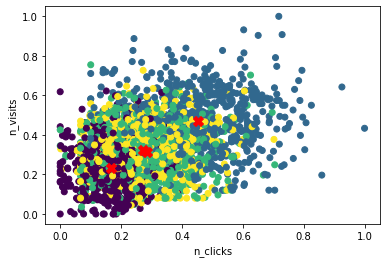

In [30]:
def viz_clusters(kmeans):
    plt.scatter(clusters['n_clicks'], clusters['n_visits'], c=clusters['label'])
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                color="red",
                marker="X",
                s=100)
    plt.xlabel('n_clicks')
    plt.ylabel('n_visits')
    
viz_clusters(kmeans)

In [33]:
kmeans_iter1 = KMeans(n_clusters=3, init="random", n_init=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1, random_state=0)
kmeans_iter3 = KMeans(n_clusters=8, init="random", n_init=1, random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

/Users/gyanarora/miniconda3/envs/scaler/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1318: FutureWarning:

algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.

/Users/gyanarora/miniconda3/envs/scaler/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1318: FutureWarning:

algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.

/Users/gyanarora/miniconda3/envs/scaler/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1318: FutureWarning:

algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.



KMeans(algorithm='full', init='random', n_init=1, random_state=0)

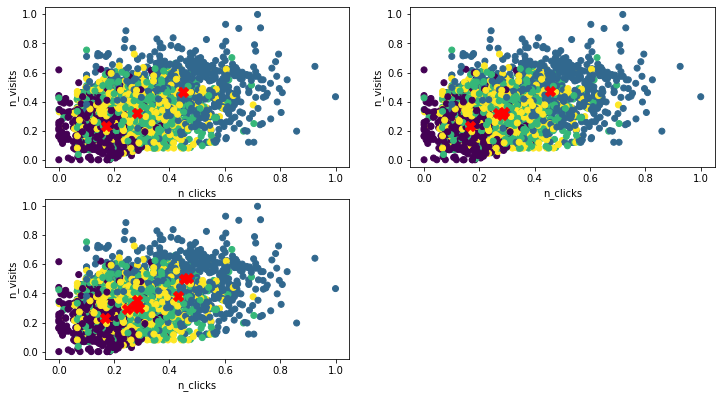

In [34]:
plt.figure(figsize=(12,10))

plt.subplot(321)
viz_clusters(kmeans_iter1)

plt.subplot(322)
viz_clusters(kmeans_iter2)

plt.subplot(323)
viz_clusters(kmeans_iter3)

In [35]:
kmeans_iter1.inertia_

280.1650962612106

In [36]:
kmeans_iter3.inertia_

195.24159155451272

In [37]:
# Inertia = Within Cluster Sum of Squares
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]

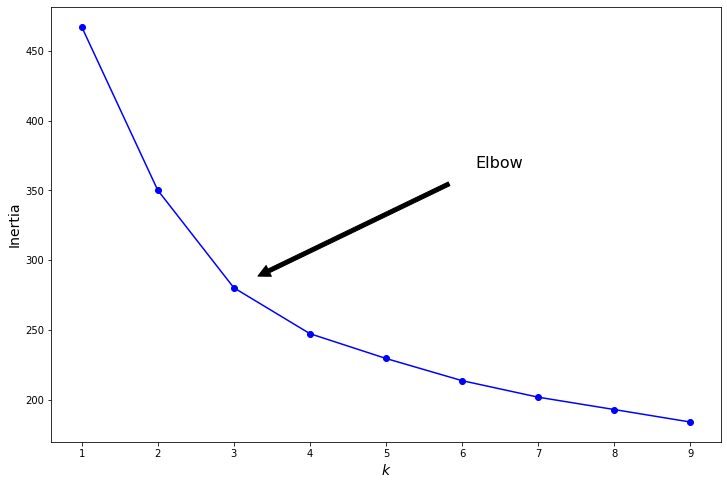

In [38]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

In [39]:
from sklearn.metrics import silhouette_score

## silhouette score for 4 clusters
silhouette_score(X, kmeans.labels_)

0.2108404992330738

In [40]:
## plot for different values of K
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

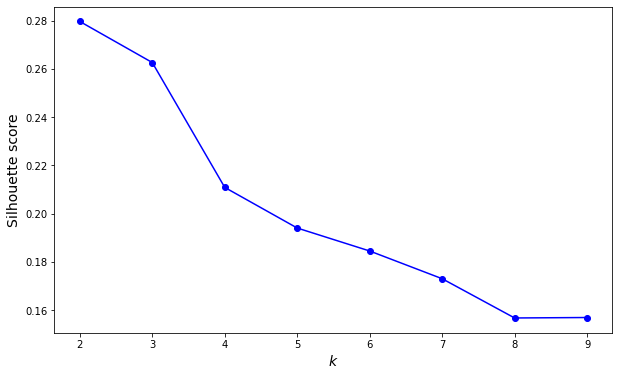

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()